In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Extraction

In [2]:
train_data = pd.read_csv("train_0OECtn8.csv")
test_data = pd.read_csv("test_N4clAbW.csv")
submission_data = pd.read_csv("sample_submission_JPlpRcN.csv")

## Data Exploration

In [3]:
train_data.head()

row_id  user_id  category_id  video_id  age  gender            profession  \
0       1    19990           37       128   24    Male               Student   
1       2     5304           32       132   14  Female               Student   
2       3     1840           12        24   19    Male               Student   
3       4    12597           23       112   19    Male               Student   
4       5    13626           23       112   27    Male  Working Professional   

   followers  views  engagement_score  
0        180   1000              4.33  
1        330    714              1.79  
2        180    138              4.35  
3        220    613              3.77  
4        220    613              3.13

In [4]:
test_data.head()

row_id  user_id  category_id  video_id  age  gender            profession  \
0   89198     7986           12        42   14    Male               Student   
1   89199    11278           34       115   14    Male               Student   
2   89200    17245            8       110   44  Female  Working Professional   
3   89201     9851           16       137   18    Male               Student   
4   89202    16008           34        96   47  Female                 Other   

   followers  views  
0        180    138  
1        230    840  
2        280    628  
3        270    462  
4        230    840

In [5]:
train_data.shape, test_data.shape

((89197, 10), (11121, 9))

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [7]:
train_data.isna().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [8]:
test_data.isna().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

**So there are no missing values in train and test data so we don't have to deal with it**

In [9]:
train_data.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [10]:
train_data.nunique()

row_id              89197
user_id             27734
category_id            47
video_id              175
age                    58
gender                  2
profession              3
followers              17
views                  43
engagement_score      229
dtype: int64

In [11]:
train_data.describe()

row_id       user_id   category_id      video_id           age  \
count  89197.000000  89197.000000  89197.000000  89197.000000  89197.000000   
mean   44599.000000  13881.909806     18.323733     77.715383     24.848616   
std    25749.100318   8005.582771     11.675154     48.469656      8.955535   
min        1.000000      1.000000      1.000000      1.000000     10.000000   
25%    22300.000000   6945.000000      8.000000     34.000000     18.000000   
50%    44599.000000  13892.000000     16.000000     76.000000     23.000000   
75%    66898.000000  20819.000000     26.000000    120.000000     32.000000   
max    89197.000000  27734.000000     47.000000    175.000000     68.000000   

          followers         views  engagement_score  
count  89197.000000  89197.000000      89197.000000  
mean     252.460172    502.980268          3.487797  
std       46.094468    268.569482          0.863498  
min      160.000000     30.000000          0.000000  
25%      230.000000    229.000000          2.900000  
50%      240.000000    467.000000          3.710000  
75%      280.000000    714.000000          4.150000  
max      360.000000   1000.000000          5.000000

There is not much data we get from this, there are no outliers in the data

## Data visuallization

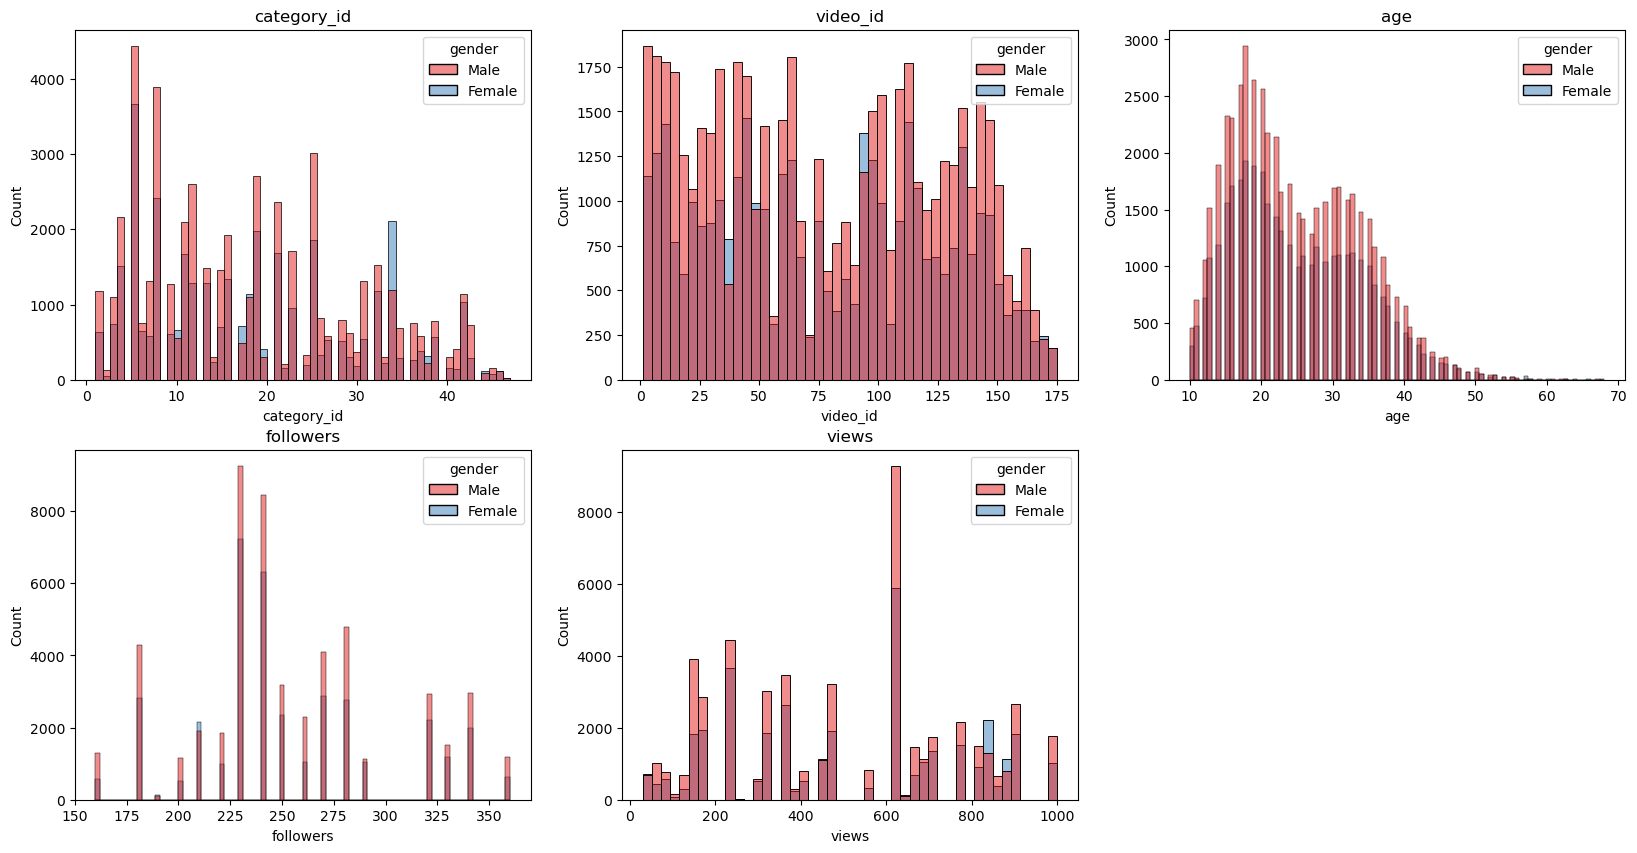

In [12]:
# plot of features wrt gender
cols = ["category_id", "video_id", "age", "followers", "views"]
plt.figure(figsize=(20,10))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.set_palette("Set1")
    sns.histplot(data = train_data,x=cols[i],hue="gender")
    plt.title(cols[i])
    plt.xlabel(cols[i])

These variables are not normally distributed and they do not give much insight to contribute to engagement score.

In [13]:
# plot variables wrt profession
cols = ["category_id", "video_id", "age", "followers", "views"]
plt.figure(figsize=(20,10))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.set_palette("Set2")
    sns.histplot(data = train_data,x=cols[i],hue="profession")
    plt.title(cols[i])
    plt.xlabel(cols[i])

These variables are also not normally distributed and they do not give much insights

## Data Encoding
Lets encode the gender and professonal features before moving forword

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
train_data["profession"] = train_data["profession"].map({"Student": 0, "Working Professional": 1, "Other": 2})
test_data["profession"] = test_data["profession"].map({"Student": 0, "Working Professional": 1, "Other": 2})

LE = LabelEncoder()
LE.fit(train_data["gender"])
train_data["gender"] = LE.transform(train_data["gender"])
LE.fit(test_data["gender"])
test_data["gender"] = LE.transform(test_data["gender"])

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

<Axes: >

We can see There are some correlation of gender,age,profession with the engagement_score

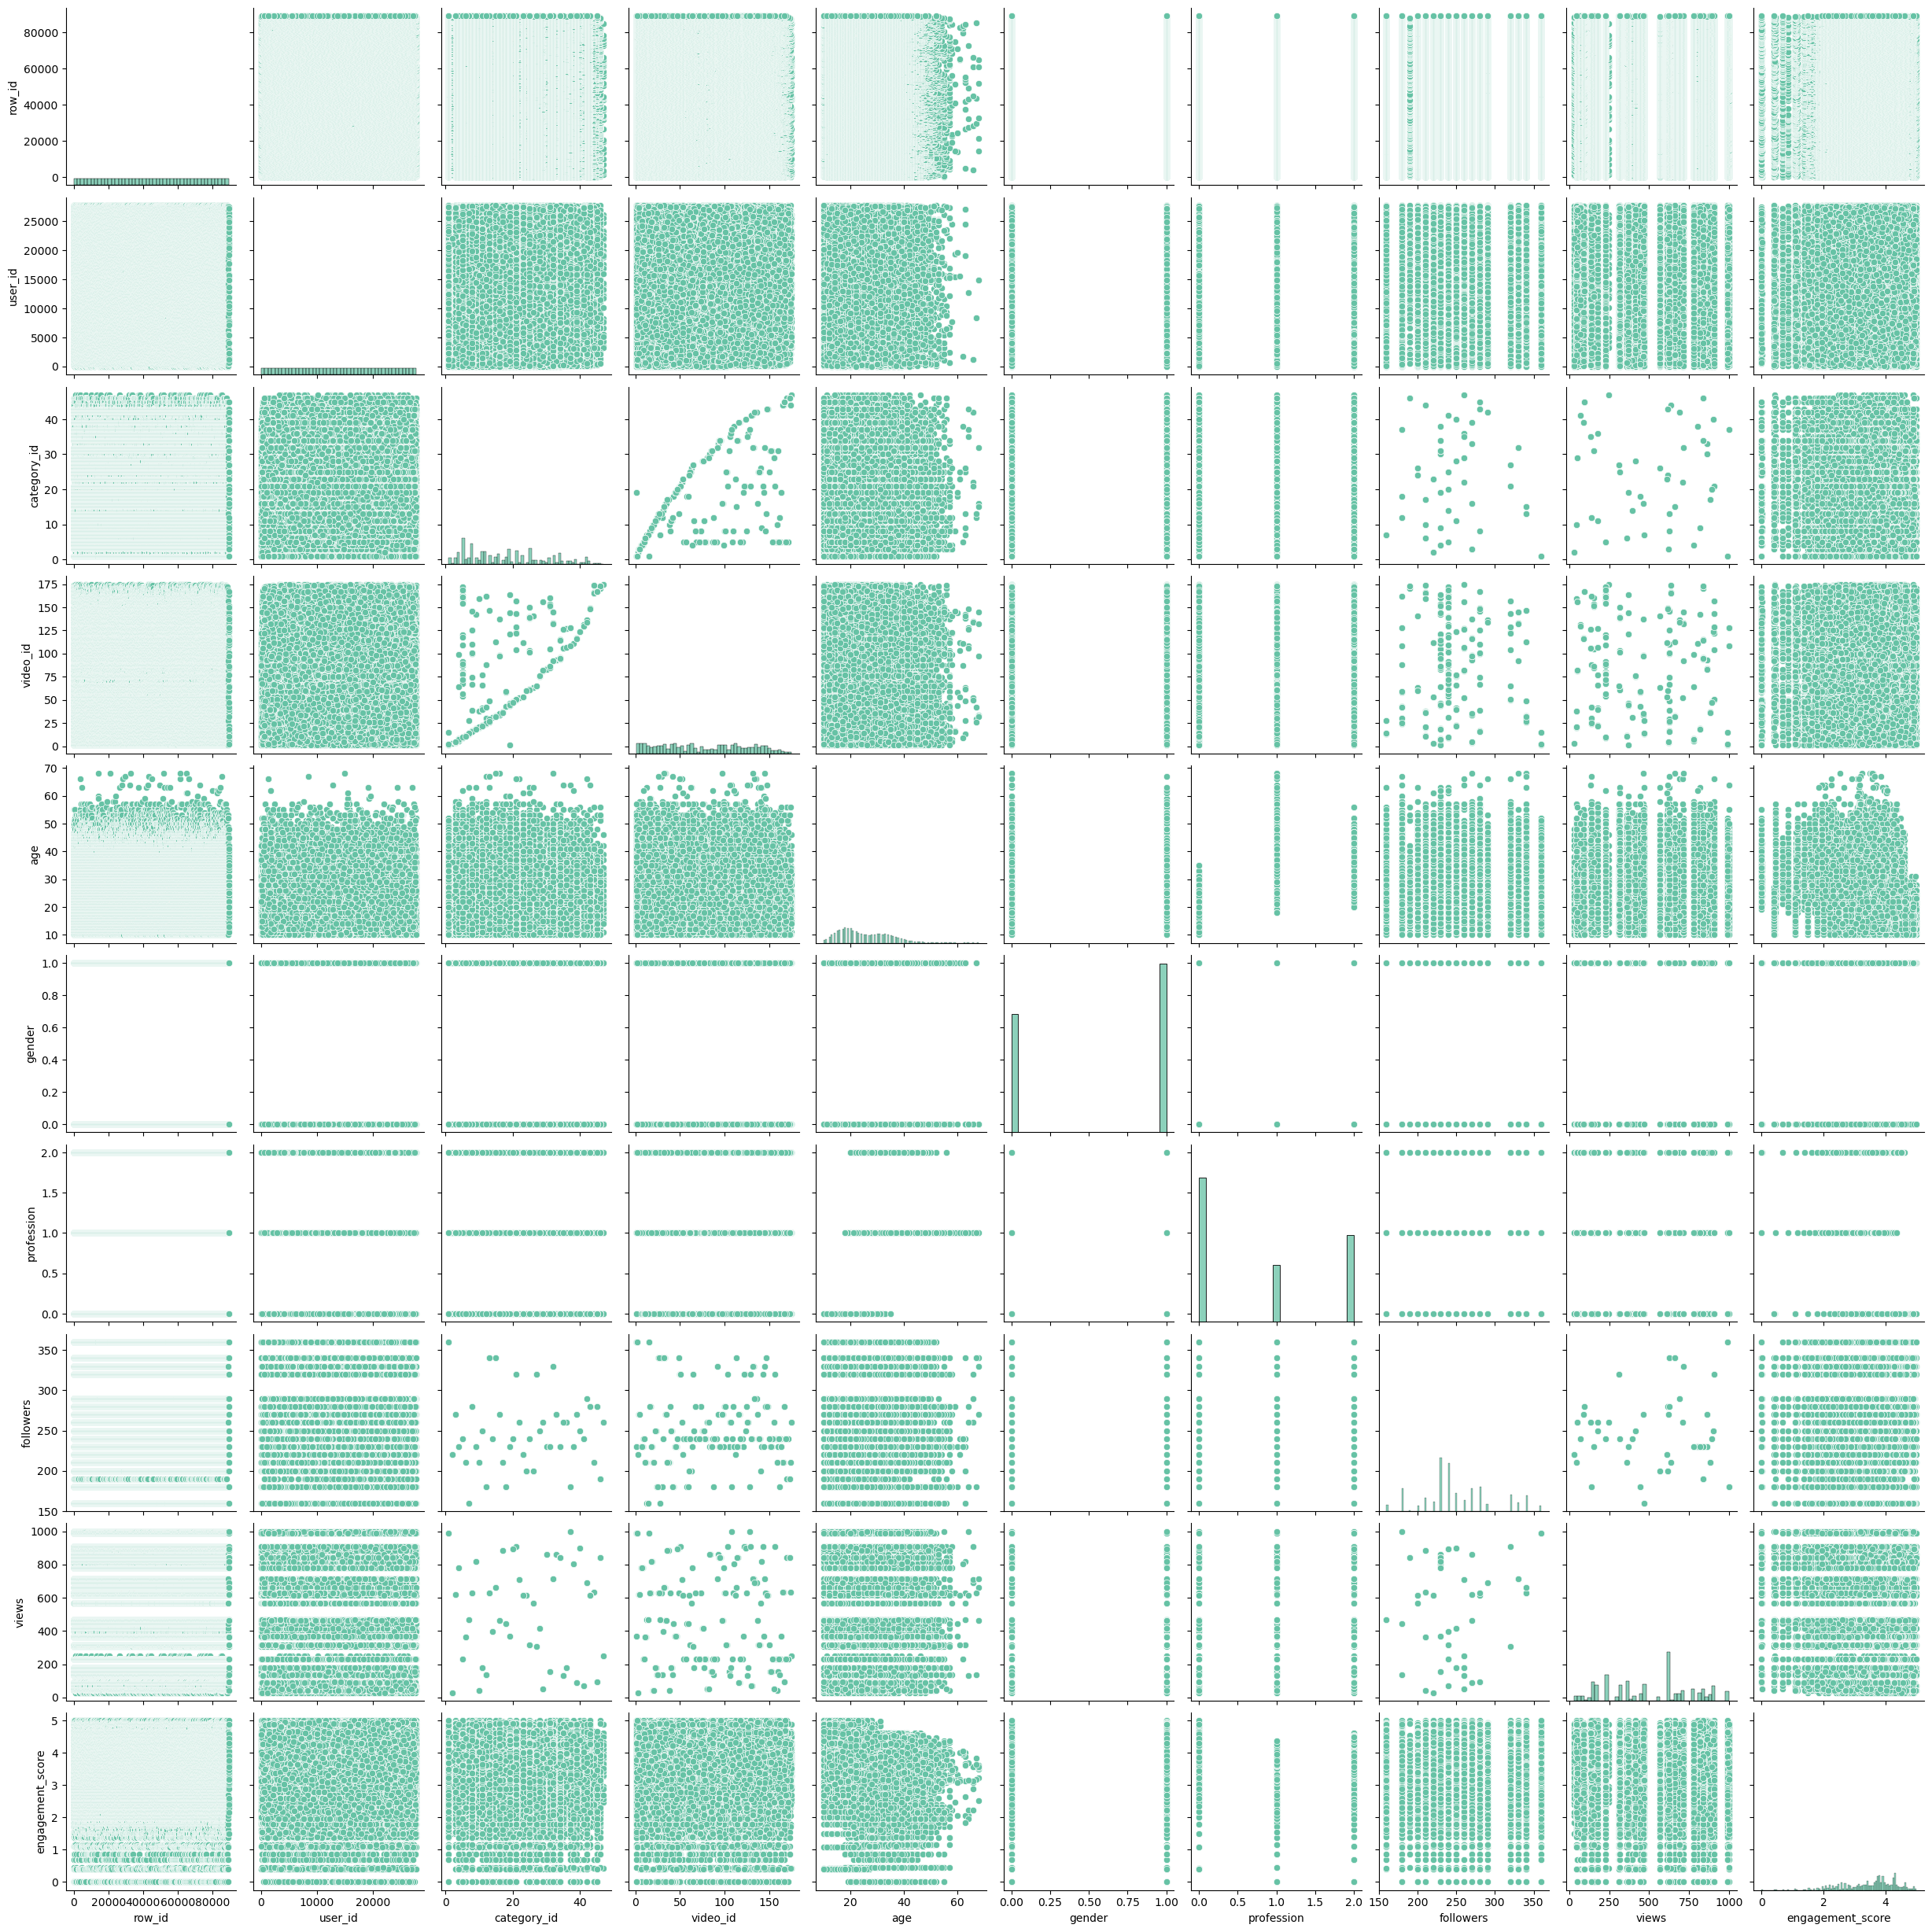

In [17]:
sns.pairplot(train_data)

Not much insight we get from this pair plots

## Utility Functions

In [18]:
# this function prints out the r squared values of the model prediction, also we can check the cross validation scores
def print_results(model, xtr, xts, ytr, yts, xx, yy, cross_val = False):
    
    print("Score the X-train with Y-train is : ", Lin_Reg_model.score(xtr,ytr))
    print("Score the X-test  with Y-test  is : ", Lin_Reg_model.score(xts,yts))
    if cross_val:
        print("Cross Validation score: ", cross_val_score(Lin_Reg_model, xx, yy, cv=10, scoring='r2').mean())


In [19]:
# generates the csv prediction file 
def generate_result(model, test_data_input, file_name):
    predictions = model.predict(test_data_input.drop(["row_id"], axis=1))
    results = pd.DataFrame({"row_id": test_data_input["row_id"], "engagement_score": predictions})
    
    # round the values to 2 decimal because the engagement_score have only 2 digits after decimal values
    results["engagement_score"] = results["engagement_score"].round(2)
    
    results.to_csv(file_name + ".csv", index=False)

In [20]:
# returns a dataframe of all the ML models accuracy scores
def get_accuracy(models, xx, yy):
    
    dic = {"R Squared": [], "MSE": [], "MAE": [], "RMSE": []}
    
    for m in models:
        
        pred = models[m].predict(xx)
        
        dic["R Squared"].append(r2_score(yy, pred))
        mse = mean_squared_error(yy, pred)
        dic["MSE"].append(round(mse, 3))
        dic["MAE"].append(round(mean_absolute_error(yy, pred), 3))
        dic["RMSE"].append(round(math.sqrt(mse), 3))
    
    return pd.DataFrame(dic, index=models.keys()).sort_values(by="R Squared", ascending=False)

## Machine Learning Modelling before Feture Engineering

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error,r2_score

In [22]:
X = train_data.drop(columns="engagement_score")
y = train_data["engagement_score"]

In [23]:
# Split the train data into to so that we can train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=34)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("y Train : ", y_train.shape)
print("y Test  : ", y_test.shape)

X Train :  (71357, 9)
X Test  :  (17840, 9)
y Train :  (71357,)
y Test  :  (17840,)


In [24]:
# Linear Regression
Lin_Reg_model = LinearRegression()
Lin_Reg_model.fit(X_train,y_train)

print_results(Lin_Reg_model, X_train, X_test, y_train, y_test, X, y, cross_val=True)

Score the X-train with Y-train is :  0.2389464278824016
Score the X-test  with Y-test  is :  0.2466435622840194
Cross Validation score:  0.24030862289724036


In [25]:
# Decision Tree Regression

DecisionTreeRegressor_model=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_depth=None,min_samples_split=2,min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0)

DecisionTreeRegressor_model.fit(X_train,y_train)

print_results(DecisionTreeRegressor_model, X_train, X_test, y_train, y_test, X, y)

Score the X-train with Y-train is :  0.2389464278824016
Score the X-test  with Y-test  is :  0.2466435622840194


In [26]:
#XG Boost

XGB_model=XGBRegressor(n_estimators=35,max_depth=7,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.18)

XGB_model.fit(X_train,y_train)

print_results(XGB_model, X_train, X_test, y_train, y_test, X, y, cross_val = True)

Score the X-train with Y-train is :  0.2389464278824016
Score the X-test  with Y-test  is :  0.2466435622840194
Cross Validation score:  0.24030862289724036


In [27]:
# Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print_results(ridge, X_train, X_test, y_train, y_test, X, y)

Score the X-train with Y-train is :  0.2389464278824016
Score the X-test  with Y-test  is :  0.2466435622840194


In [28]:
# Lasso

lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)

print_results(lasso, X_train, X_test, y_train, y_test, X, y, cross_val = True)

Score the X-train with Y-train is :  0.2389464278824016
Score the X-test  with Y-test  is :  0.2466435622840194
Cross Validation score:  0.24030862289724036


In [29]:
# Decision tree with Hyperparameter Tuning
# GridSearchCV checks multiple hyperparameters for a model and selects which gives the best results

depth  =list(range(1,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

print_results(tree, X_train, X_test, y_train, y_test, X, y)

Score the X-train with Y-train is :  0.2389464278824016
Score the X-test  with Y-test  is :  0.2466435622840194


In [30]:
# Elasitc Net
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)

print_results(elastic_model, X_train, X_test, y_train, y_test, X, y, cross_val=True)

Score the X-train with Y-train is :  0.2389464278824016
Score the X-test  with Y-test  is :  0.2466435622840194
Cross Validation score:  0.24030862289724036


In [31]:
# Cat Boost Regressor
cat = CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=42)

cat.fit(X_train, y_train)

print_results(cat, X_train, X_test, y_train, y_test, X, y, cross_val=True)

0:	learn: 0.8371203	total: 150ms	remaining: 14.9s
1:	learn: 0.8171432	total: 163ms	remaining: 7.99s
2:	learn: 0.7998056	total: 175ms	remaining: 5.67s
3:	learn: 0.7856069	total: 190ms	remaining: 4.56s
4:	learn: 0.7737157	total: 200ms	remaining: 3.79s
5:	learn: 0.7638405	total: 214ms	remaining: 3.34s
6:	learn: 0.7553764	total: 227ms	remaining: 3.01s
7:	learn: 0.7488940	total: 240ms	remaining: 2.75s
8:	learn: 0.7422359	total: 250ms	remaining: 2.53s
9:	learn: 0.7370110	total: 262ms	remaining: 2.35s
10:	learn: 0.7324779	total: 274ms	remaining: 2.22s
11:	learn: 0.7289160	total: 287ms	remaining: 2.11s
12:	learn: 0.7256617	total: 296ms	remaining: 1.98s
13:	learn: 0.7231779	total: 306ms	remaining: 1.88s
14:	learn: 0.7210398	total: 314ms	remaining: 1.78s
15:	learn: 0.7188335	total: 324ms	remaining: 1.7s
16:	learn: 0.7172054	total: 332ms	remaining: 1.62s
17:	learn: 0.7159285	total: 340ms	remaining: 1.55s
18:	learn: 0.7147973	total: 349ms	remaining: 1.49s
19:	learn: 0.7135735	total: 357ms	remainin

## Model Evalution

In [32]:
models = {"Linear Regression": Lin_Reg_model, "Decision Tree Regressor": DecisionTreeRegressor_model, "XG Boost": XGB_model, "Ridge Regression": ridge, "Lasso Regression": lasso, "Decision tree with GridSearchCV": tree, "Elastic Net": elastic_model, "Cat Boost Regressor": cat}
get_accuracy(models, X_test, y_test)

R Squared    MSE    MAE   RMSE
XG Boost                          0.367232  0.482  0.523  0.695
Cat Boost Regressor               0.359632  0.488  0.527  0.699
Decision tree with GridSearchCV   0.336925  0.505  0.536  0.711
Linear Regression                 0.246644  0.574  0.584  0.758
Ridge Regression                  0.246643  0.574  0.584  0.758
Lasso Regression                  0.246510  0.574  0.584  0.758
Elastic Net                       0.208612  0.603  0.607  0.777
Decision Tree Regressor          -0.272056  0.970  0.716  0.985

We see the best model so far is xg boost but still the accuracy is too low which we can improve by feature engineering

## Feature Engineering

#### Lets check weather any feature needs feature transformation or scaling ( Normalization)

In [33]:
train_data.head(1)

row_id  user_id  category_id  video_id  age  gender  profession  followers  \
0       1    19990           37       128   24       1           0        180   

   views  engagement_score  
0   1000              4.33

In [34]:
plt.figure(figsize=(20,10))
for i, col in enumerate(train_data.columns[1:]):
    plt.subplot(3,3,i+1)
    sns.set_palette("Set2")
    sns.histplot(data = train_data[col])
    plt.title(col)
    plt.xlabel(col)
plt.tight_layout(pad=1.5)

most of the data is not normally distributed and it's not a good idea to transfrom it for exmaple its not a good idea to log() transform "age" feature, it might loose information

#### Binning age

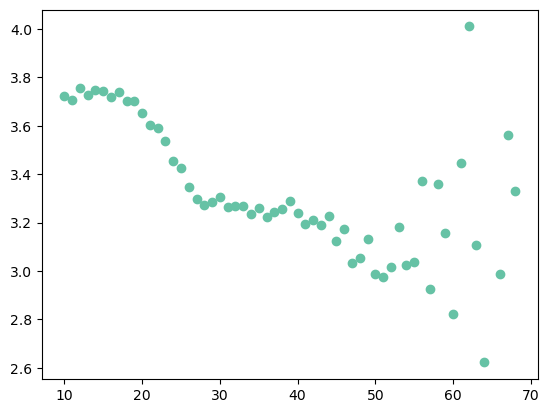

In [35]:
age_eng = train_data.groupby("age")["engagement_score"].mean().reset_index()
plt.scatter(x = age_eng["age"], y = age_eng["engagement_score"])

We can see a trend, young users have a high engagement score on an avg

adults have relatively low 

users above 50 years have scattered data

so lets divide out age into 3 bins: (less than 28), (bewteen 28 and 50), (greater than 50)

#### Feature Creation - "age_group"

In [36]:
bin_edges = [0, 28, 50, float('inf')]
bin_labels = [2, 1, 0]

train_data['age_group'] = pd.cut(train_data['age'], bins=bin_edges, labels=bin_labels)
test_data['age_group'] = pd.cut(test_data['age'], bins=bin_edges, labels=bin_labels)
train_data["age_group"] = train_data["age_group"].astype("int64")
test_data["age_group"] = test_data["age_group"].astype("int64")

### Interactions b/t Features

#### views per follower
how many views per followers a category got could be a usefull feature

#### Feature Creation - "views_per_foll"

In [37]:
train_data["views_per_foll"] = train_data["views"] / train_data["followers"]
test_data["views_per_foll"] = test_data["views"] / test_data["followers"]

#### Mean of engagement_score group by all other features
#### Feature Creation
- mean of engagement_score per user_id : **mean_eng_userid**
- mean of engagement_score per category_id : **mean_eng_cat**
- mean of engagement_score per video_id : **mean_eng_videoid**
- mean of engagement_score per age : **mean_eng_age**
- mean of engagement_score per gender : **mean_eng_gen**
- mean of engagement_score per profession : **mean_eng_prof**
- mean of engagement_score per followers : **mean_eng_fol**
- mean of engagement_score per views : **mean_eng_views**

In [38]:
# all the names of new feature are keys and the value which we are taking the mean of are values
eng_mean_dic = {"mean_eng_userid": "user_id","mean_eng_cat": "category_id", "mean_eng_videoid": "video_id",
                "mean_eng_age": "age", "mean_eng_gen": "gender", "mean_eng_prof": "profession",
                "mean_eng_fol": "followers", "mean_eng_views": "views"}

# calculate all the features and merge them into the train and test data
for i in eng_mean_dic:
    eng_fet = train_data.groupby(eng_mean_dic[i])["engagement_score"].mean().reset_index()
    eng_fet.rename(columns={"engagement_score": i}, inplace=True)
    train_data = pd.merge(train_data, eng_fet, how='left', on = eng_mean_dic[i])
    test_data = pd.merge(test_data, eng_fet, how='left', on = eng_mean_dic[i])

In [39]:
train_data.head(1)

row_id  user_id  category_id  video_id  age  gender  profession  followers  \
0       1    19990           37       128   24       1           0        180   

   views  engagement_score  age_group  views_per_foll  mean_eng_userid  \
0   1000              4.33          2        5.555556         4.673333   

   mean_eng_cat  mean_eng_videoid  mean_eng_age  mean_eng_gen  mean_eng_prof  \
0      3.314751          3.325765      3.454467      3.783555        3.73797   

   mean_eng_fol  mean_eng_views  
0       3.41096        3.314751

In [40]:
test_data.head(1)

row_id  user_id  category_id  video_id  age  gender  profession  followers  \
0   89198     7986           12        42   14       1           0        180   

   views  age_group  views_per_foll  mean_eng_userid  mean_eng_cat  \
0    138          2        0.766667            4.195      3.571666   

   mean_eng_videoid  mean_eng_age  mean_eng_gen  mean_eng_prof  mean_eng_fol  \
0          3.619694      3.746523      3.783555        3.73797       3.41096   

   mean_eng_views  
0        3.571666

In [41]:
# lets check the data one more time just to be sure
train_data.isna().sum().sum(), test_data.isna().sum().sum()

(0, 0)

#### Mean of engagement_score group by multiple features
#### Feature Creation - 
- mean of engagement_score per category_id and profession : **mean_cat-prof**
- mean of engagement_score per category_id and gender : **mean_cat-gender**
- mean of engagement_score per category_id and user_id : **mean_cat_userid**
- mean of engagement_score per catrgory_id and age : **mean_cat-age**
- mean of engagement_score per category_id and age_group : **mean_cat-agegroup**
- mean of engagement_score per video_id and age : **mean_vid-age**
- mean of engagement_score per video_id and gender : **mean_vid-gender**
- mean of engagement_score per video_id and profession : **mean_vid-prof**
- mean of engagement_score per video_id and age_group : **mean_vid-agegp**
- mean of engagement_score per profession and age : **mean_vid-age**
- mean of engagement_score per profession and age_group : **mean_prof-agegp**

In [42]:
# all the names of new feature are keys and the value which we are taking the mean of are values
eng_mean_dic = {"mean_cat-prof": ["category_id", "profession"], "mean_cat-gender": ["category_id", "gender"],
                "mean_cat_userid": ["category_id", "user_id"], "mean_cat-age": ["category_id", "age"],
                "mean_prof-age": ["profession", "age"], "mean_vid-age": ["video_id", "age"],
                "mean_vid-gender": ["video_id", "gender"], "mean_vid-prof": ["video_id", "profession"],
                "mean_vid-agegp": ["video_id", "age_group"], "mean_cat-agegroup": ["category_id", "age_group"],
                "mean_prof-agegp": ["profession", "age_group"]}

# calculate all the features and merge them into the train and test data
for i in eng_mean_dic:
    eng_fet = train_data.groupby(eng_mean_dic[i])["engagement_score"].mean().reset_index()
    eng_fet.rename(columns={"engagement_score": i}, inplace=True)
    train_data = pd.merge(train_data, eng_fet, how='left', on = eng_mean_dic[i])
    test_data = pd.merge(test_data, eng_fet, how='left', on = eng_mean_dic[i])

In [43]:
train_data.head(1)

row_id  user_id  category_id  video_id  age  gender  profession  followers  \
0       1    19990           37       128   24       1           0        180   

   views  engagement_score  ...  mean_cat-gender  mean_cat_userid  \
0   1000              4.33  ...         3.741672             4.33   

   mean_cat-age  mean_prof-age  mean_vid-age  mean_vid-gender  mean_vid-prof  \
0      3.168077       3.743898      3.306429         3.742079        3.54336   

   mean_vid-agegp  mean_cat-agegroup  mean_prof-agegp  
0        3.428761           3.425822         3.737394  

[1 rows x 31 columns]

In [44]:
train_data.isna().sum().sum()

0

In [45]:
# lets fill the null values in the test data with the mean values
test_data["mean_vid-agegp"] = test_data["mean_vid-agegp"].fillna(train_data["engagement_score"].mean())
test_data["mean_vid-age"] = test_data["mean_vid-age"].fillna(train_data["engagement_score"].mean())
test_data.isna().sum().sum()

0

<Axes: >

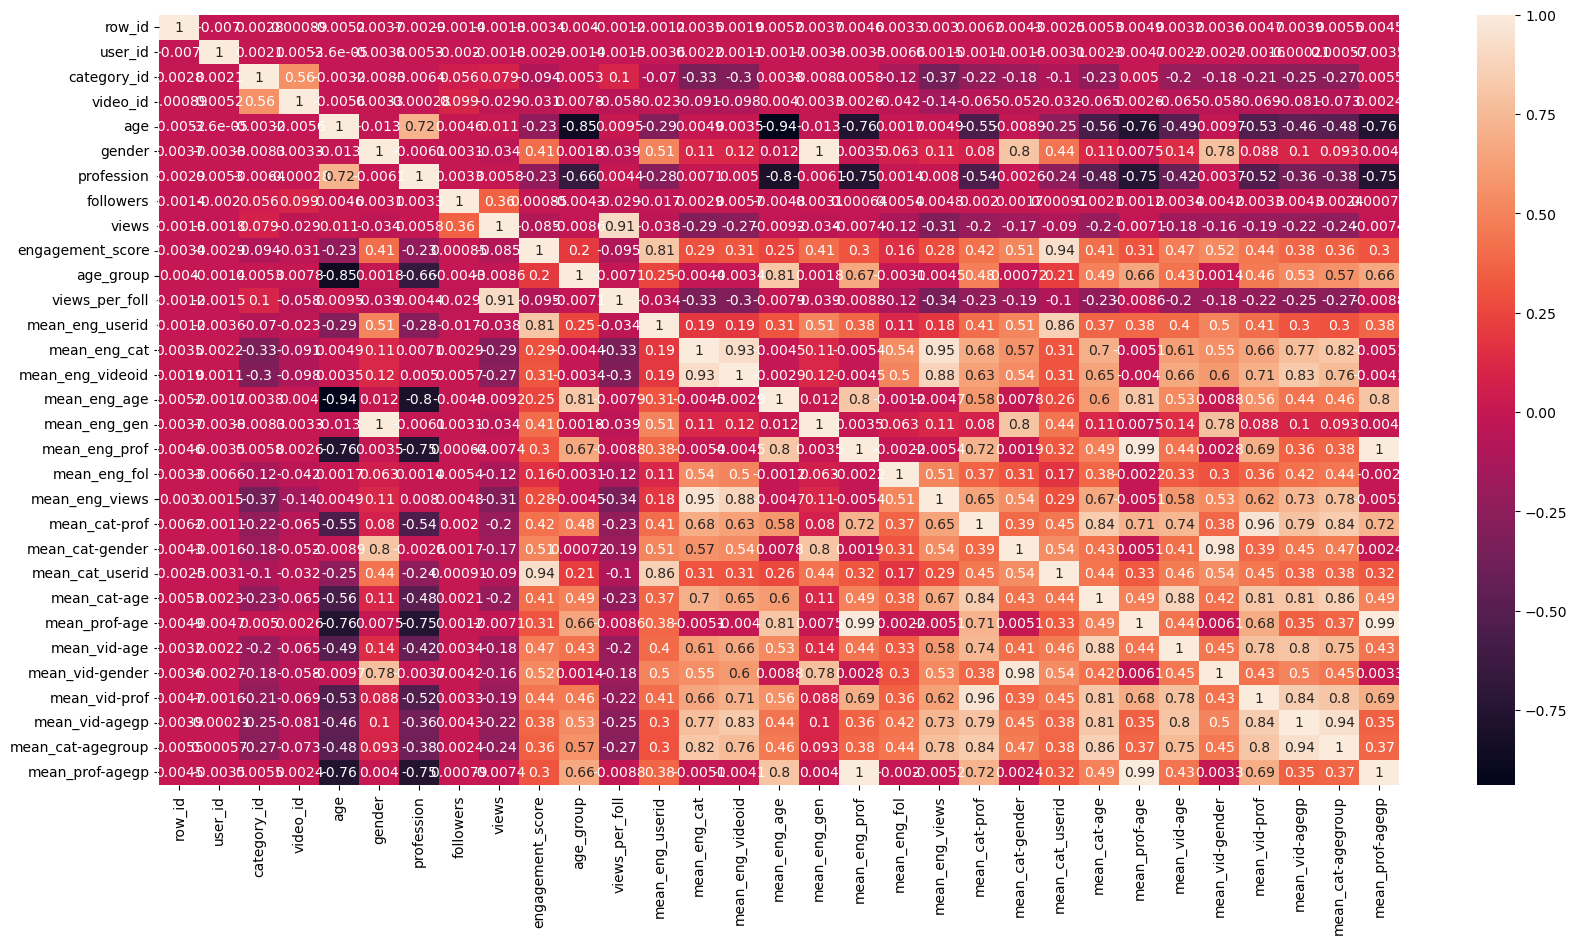

In [46]:
# lets have a look on the heatmap once again
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

This time we can see high correlation with many new features we have created

## Machine Learning modelling after feature engineering

In [47]:
# Lets split our train data so that we can use this data for testing of our models also
X = train_data.drop(columns=["engagement_score", "row_id"])
y = train_data["engagement_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=34)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("y Train : ", y_train.shape)
print("y Test  : ", y_test.shape)

X Train :  (71357, 29)
X Test  :  (17840, 29)
y Train :  (71357,)
y Test  :  (17840,)


In [48]:
# Linear Regression
Lin_Reg_model = LinearRegression()
Lin_Reg_model.fit(X_train,y_train)

print_results(Lin_Reg_model, X_train, X_test, y_train, y_test, X, y, cross_val=True)

Score the X-train with Y-train is :  0.8884268457798834
Score the X-test  with Y-test  is :  0.8900617967336315
Cross Validation score:  0.8886826808652042


In [49]:
# Decision Tree Regression

DecisionTreeRegressor_model=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_depth=None,min_samples_split=2,min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0)

DecisionTreeRegressor_model.fit(X_train,y_train)

print_results(DecisionTreeRegressor_model, X_train, X_test, y_train, y_test, X, y)

Score the X-train with Y-train is :  0.8884268457798834
Score the X-test  with Y-test  is :  0.8900617967336315


In [50]:
#XG Boost
XGB_model=XGBRegressor(n_estimators=35,max_depth=7,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.18)

XGB_model.fit(X_train,y_train)

print_results(XGB_model, X_train, X_test, y_train, y_test, X, y, cross_val = True)

Score the X-train with Y-train is :  0.8884268457798834
Score the X-test  with Y-test  is :  0.8900617967336315
Cross Validation score:  0.8886826808652042


In [51]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print_results(ridge, X_train, X_test, y_train, y_test, X, y, cross_val=True)

Score the X-train with Y-train is :  0.8884268457798834
Score the X-test  with Y-test  is :  0.8900617967336315
Cross Validation score:  0.8886826808652042


In [52]:
# Lasso
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)

print_results(lasso, X_train, X_test, y_train, y_test, X, y, cross_val = True)

Score the X-train with Y-train is :  0.8884268457798834
Score the X-test  with Y-test  is :  0.8900617967336315
Cross Validation score:  0.8886826808652042


In [53]:
# Decision tree with hyperparameter tuning 
# GridSearchCV checks multiple hyperparameters for a model and selects which gives the best results

depth  =list(range(1,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

print_results(tree, X_train, X_test, y_train, y_test, X, y)

Score the X-train with Y-train is :  0.8884268457798834
Score the X-test  with Y-test  is :  0.8900617967336315


In [54]:
# Elasitc Net
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)

print_results(elastic_model, X_train, X_test, y_train, y_test, X, y, cross_val=True)

Score the X-train with Y-train is :  0.8884268457798834
Score the X-test  with Y-test  is :  0.8900617967336315
Cross Validation score:  0.8886826808652042


In [55]:
# Cat Boost Regressor
cat = CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=42)
cat.fit(X_train, y_train)

print_results(cat, X_train, X_test, y_train, y_test, X, y, cross_val=True)

0:	learn: 0.7908348	total: 15.1ms	remaining: 1.49s
1:	learn: 0.7283199	total: 32.6ms	remaining: 1.6s
2:	learn: 0.6723089	total: 46.9ms	remaining: 1.51s
3:	learn: 0.6231511	total: 59.3ms	remaining: 1.42s
4:	learn: 0.5784070	total: 72.5ms	remaining: 1.38s
5:	learn: 0.5400050	total: 83.5ms	remaining: 1.31s
6:	learn: 0.5054477	total: 98.2ms	remaining: 1.3s
7:	learn: 0.4749480	total: 110ms	remaining: 1.27s
8:	learn: 0.4488728	total: 124ms	remaining: 1.25s
9:	learn: 0.4261038	total: 136ms	remaining: 1.23s
10:	learn: 0.4061249	total: 150ms	remaining: 1.21s
11:	learn: 0.3891164	total: 164ms	remaining: 1.2s
12:	learn: 0.3749499	total: 178ms	remaining: 1.19s
13:	learn: 0.3623102	total: 191ms	remaining: 1.17s
14:	learn: 0.3523217	total: 205ms	remaining: 1.16s
15:	learn: 0.3438390	total: 225ms	remaining: 1.18s
16:	learn: 0.3362328	total: 238ms	remaining: 1.16s
17:	learn: 0.3297241	total: 251ms	remaining: 1.14s
18:	learn: 0.3240536	total: 262ms	remaining: 1.12s
19:	learn: 0.3195901	total: 274ms	rem

## Evalution of Models after Feature Engineering

In [56]:
models = {"Linear Regression": Lin_Reg_model, "Decision Tree Regressor": DecisionTreeRegressor_model, "XG Boost": XGB_model, "Ridge Regression": ridge, "Lasso Regression": lasso, "Decision tree with GridSearchCV": tree, "Elastic Net": elastic_model, "Cat Boost Regressor": cat}
get_accuracy(models, X_test, y_test)

R Squared    MSE    MAE   RMSE
Ridge Regression                  0.890067  0.084  0.182  0.289
Linear Regression                 0.890062  0.084  0.182  0.289
Cat Boost Regressor               0.889218  0.084  0.181  0.291
Lasso Regression                  0.888264  0.085  0.180  0.292
XG Boost                          0.886917  0.086  0.180  0.294
Decision tree with GridSearchCV   0.880258  0.091  0.183  0.302
Elastic Net                       0.864577  0.103  0.220  0.321
Decision Tree Regressor           0.711202  0.220  0.277  0.469

Now that's a huge imporvement on our model's performance

We can see our best model is Ridge regression so far

## Feature Selection

To improve the performance further we can drop there features that have low correlation with engagement_scores and then train the models

The features are selected after many iterations

In [57]:
drop_cols = ["user_id", "category_id", "video_id", "followers", "views", "views_per_foll"]
drop_cols += ["age", "profession", "age_group", "mean_eng_fol", "mean_eng_views", "mean_eng_cat", "mean_eng_age", ]
drop_cols += ["mean_vid-agegp", "mean_cat-agegroup", "mean_prof-age", "mean_eng_prof", "mean_eng_videoid"]

train_data.drop(columns = drop_cols, inplace=True)
test_data.drop(columns = drop_cols, inplace=True)

<Axes: >

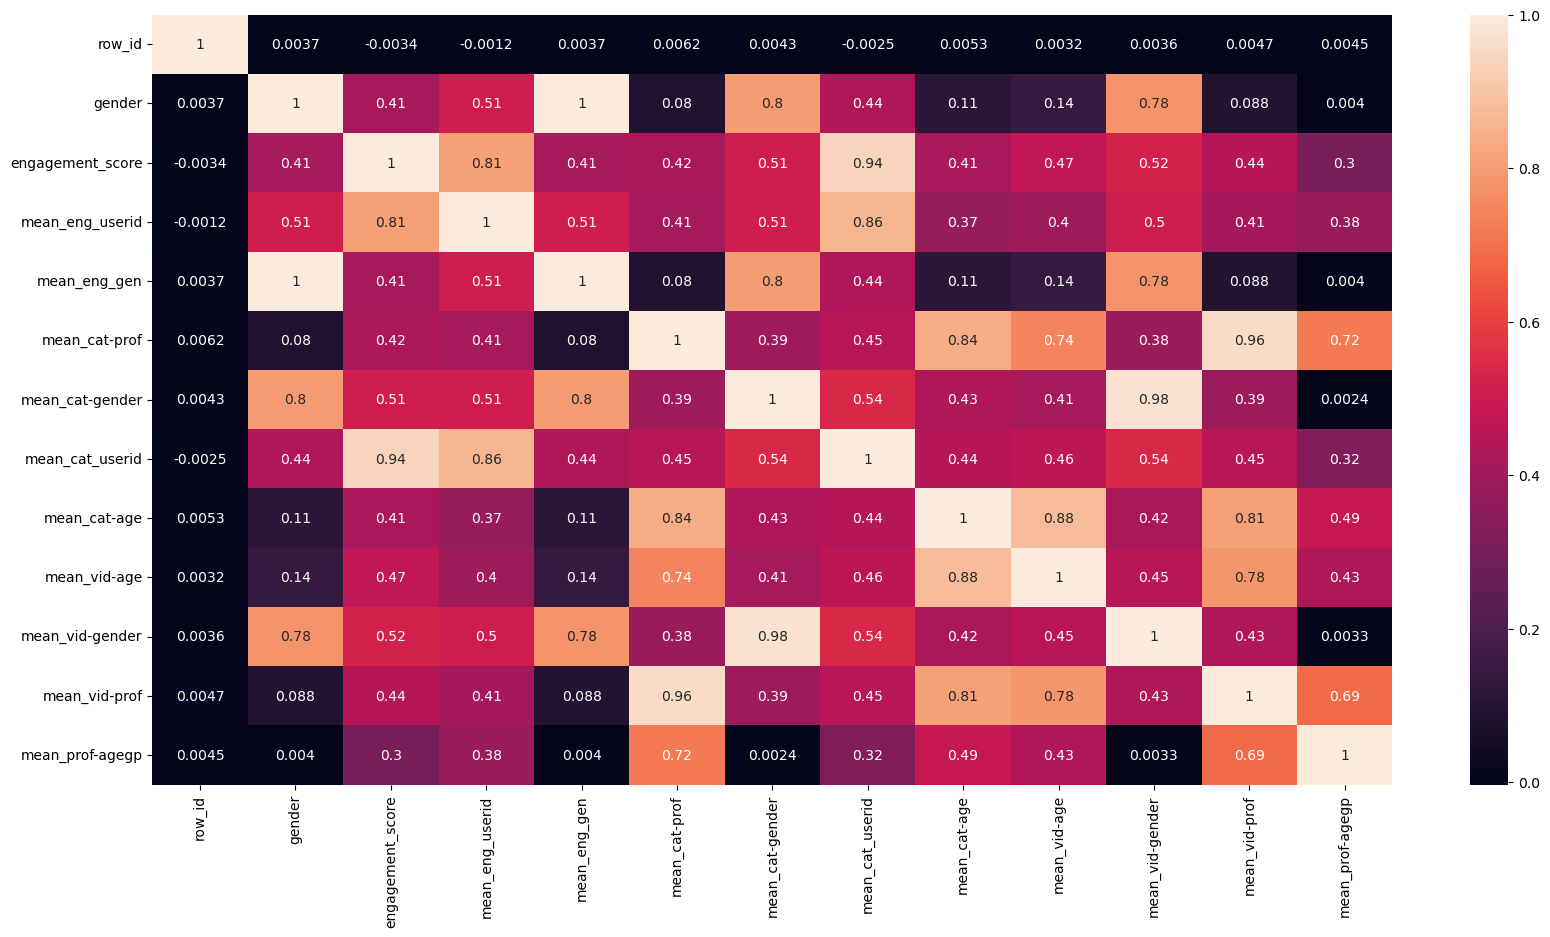

In [58]:
# lets have a look on the heatmap once again
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

## Machine Learning Modeling after Feature Selection

In [59]:
# Lets split our train data so that we can use this data for testing of our models also
X = train_data.drop(columns=["engagement_score", "row_id"])
y = train_data["engagement_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=34)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("y Train : ", y_train.shape)
print("y Test  : ", y_test.shape)

X Train :  (71357, 11)
X Test  :  (17840, 11)
y Train :  (71357,)
y Test  :  (17840,)


In [60]:
# Linear Regression
Lin_Reg_model = LinearRegression()
Lin_Reg_model.fit(X_train,y_train)

print_results(Lin_Reg_model, X_train, X_test, y_train, y_test, X, y, cross_val=True)

Score the X-train with Y-train is :  0.8883398681859862
Score the X-test  with Y-test  is :  0.890128430813961
Cross Validation score:  0.8886730850227877


In [61]:
# Decision Tree Regression

DecisionTreeRegressor_model=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_depth=None,min_samples_split=2,min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0)

DecisionTreeRegressor_model.fit(X_train,y_train)

print_results(DecisionTreeRegressor_model, X_train, X_test, y_train, y_test, X, y)

Score the X-train with Y-train is :  0.8883398681859862
Score the X-test  with Y-test  is :  0.890128430813961


In [62]:
#XG Boost
XGB_model=XGBRegressor(n_estimators=35,max_depth=7,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.18)

XGB_model.fit(X_train,y_train)

print_results(XGB_model, X_train, X_test, y_train, y_test, X, y, cross_val = True)

Score the X-train with Y-train is :  0.8883398681859862
Score the X-test  with Y-test  is :  0.890128430813961
Cross Validation score:  0.8886730850227877


In [63]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print_results(ridge, X_train, X_test, y_train, y_test, X, y, cross_val=True)

Score the X-train with Y-train is :  0.8883398681859862
Score the X-test  with Y-test  is :  0.890128430813961
Cross Validation score:  0.8886730850227877


In [64]:
# Lasso
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)

print_results(lasso, X_train, X_test, y_train, y_test, X, y, cross_val = True)

Score the X-train with Y-train is :  0.8883398681859862
Score the X-test  with Y-test  is :  0.890128430813961
Cross Validation score:  0.8886730850227877


In [65]:
# Decision tree with hyperparameter tuning 
# GridSearchCV checks multiple hyperparameters for a model and selects which gives the best results

depth  =list(range(1,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

print_results(tree, X_train, X_test, y_train, y_test, X, y)

Score the X-train with Y-train is :  0.8883398681859862
Score the X-test  with Y-test  is :  0.890128430813961


In [66]:
# Elasitc Net
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)

print_results(elastic_model, X_train, X_test, y_train, y_test, X, y, cross_val=True)

Score the X-train with Y-train is :  0.8883398681859862
Score the X-test  with Y-test  is :  0.890128430813961
Cross Validation score:  0.8886730850227877


In [67]:
# Cat Boost Regressor
cat = CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=42)
cat.fit(X_train, y_train)

print_results(cat, X_train, X_test, y_train, y_test, X, y, cross_val=True)

0:	learn: 0.7892784	total: 11.9ms	remaining: 1.18s
1:	learn: 0.7264382	total: 22.8ms	remaining: 1.12s
2:	learn: 0.6709677	total: 33.9ms	remaining: 1.1s
3:	learn: 0.6206117	total: 42.9ms	remaining: 1.03s
4:	learn: 0.5763661	total: 52.9ms	remaining: 1s
5:	learn: 0.5370367	total: 65.9ms	remaining: 1.03s
6:	learn: 0.5032459	total: 75.3ms	remaining: 1s
7:	learn: 0.4734789	total: 84.8ms	remaining: 976ms
8:	learn: 0.4468264	total: 93.8ms	remaining: 948ms
9:	learn: 0.4237172	total: 103ms	remaining: 927ms
10:	learn: 0.4045277	total: 113ms	remaining: 915ms
11:	learn: 0.3878845	total: 125ms	remaining: 913ms
12:	learn: 0.3734890	total: 136ms	remaining: 912ms
13:	learn: 0.3613771	total: 147ms	remaining: 903ms
14:	learn: 0.3513721	total: 156ms	remaining: 885ms
15:	learn: 0.3424571	total: 165ms	remaining: 868ms
16:	learn: 0.3349747	total: 175ms	remaining: 854ms
17:	learn: 0.3285911	total: 187ms	remaining: 850ms
18:	learn: 0.3231580	total: 197ms	remaining: 841ms
19:	learn: 0.3185363	total: 206ms	remai

## Evalution of models after Feature Selection

In [68]:
models = {"Linear Regression": Lin_Reg_model, "Decision Tree Regressor": DecisionTreeRegressor_model, "XG Boost": XGB_model, "Ridge Regression": ridge, "Lasso Regression": lasso, "Decision tree with GridSearchCV": tree, "Elastic Net": elastic_model, "Cat Boost Regressor": cat}
get_accuracy(models, X_test, y_test)

R Squared    MSE    MAE   RMSE
Linear Regression                 0.890128  0.084  0.182  0.289
Ridge Regression                  0.890128  0.084  0.182  0.289
Cat Boost Regressor               0.889433  0.084  0.180  0.290
Lasso Regression                  0.888327  0.085  0.180  0.292
XG Boost                          0.886545  0.086  0.180  0.294
Decision tree with GridSearchCV   0.880258  0.091  0.183  0.302
Elastic Net                       0.864985  0.103  0.219  0.321
Decision Tree Regressor           0.726384  0.209  0.266  0.457

We got slight improvements from the Feature Selection

Linear Regression is our best model so far

## Creating the csv file of predictions that has to be submitted 

In [70]:
# generate_result(Lin_Reg_model, test_data, "linreg")
# generate_result(XGB_model, test_data, "xgboost")
# generate_result(ridge, test_data, "ridge")
# generate_result(tree, test_data, "dtreeGridSearch")
# generate_result(lasso, test_data, "lasso")
# generate_result(DecisionTreeRegressor_model, test_data, "dtree")
# generate_result(cat, test_data, "catboost")
# generate_result(elastic_model, test_data, "elasticNet")

# END